<a href="https://colab.research.google.com/github/sfeldmanMIG25/Feldman-Investigating_Tour_Length_Estimators_to_Solve_Vehicle_Routing_Problem/blob/main/VRPExpirementalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quick Analysis of XML100 2-Opt Tabu Search

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  excel_file_path = fn
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

try:
    df = pd.read_excel(excel_file_path)
    print("DataFrame created successfully.")
    print("\nHeader of the DataFrame:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{excel_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Saving summary_results_tabu_simple.xlsx to summary_results_tabu_simple.xlsx
User uploaded file "summary_results_tabu_simple.xlsx" with length 15802 bytes
DataFrame created successfully.

Header of the DataFrame:


,instance,solver,Heuristic_Estimated_Cost,Heuristic_True_Cost,Optimal_Cost,True_Gap,Estimator_Gap,Total_Time,Max_Customers_Per_Vehicle,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,XML100_1113_14,tabu_simple,15109.43,15728.13,15157.0,3.77,-3.95,7421.08,11,NaN,NaN,NaN
1,XML100_1113_22,tabu_simple,14209.08,14472.64,14115.0,2.53,-1.87,7483.78,12,NaN,NaN,NaN
2,XML100_1114_09,tabu_simple,11855.06,12176.20,11847.0,2.78,-2.19,7517.93,12,NaN,NaN,NaN
3,XML100_1114_15,tabu_simple,11265.20,11676.51,11091.0,5.28,-2.23,7328.86,15,NaN,NaN,NaN
4,XML100_1115_05,tabu_simple,10856.94,11098.94,10499.0,5.71,-4.34,7501.36,22,NaN,NaN,NaN


In [ ]:
df = df.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])
print("Unnamed columns removed.")
display(df.head())

Unnamed columns removed.


,instance,solver,Heuristic_Estimated_Cost,Heuristic_True_Cost,Optimal_Cost,True_Gap,Estimator_Gap,Total_Time,Max_Customers_Per_Vehicle
0,XML100_1113_14,tabu_simple,15109.43,15728.13,15157.0,3.77,-3.95,7421.08,11
1,XML100_1113_22,tabu_simple,14209.08,14472.64,14115.0,2.53,-1.87,7483.78,12
2,XML100_1114_09,tabu_simple,11855.06,12176.20,11847.0,2.78,-2.19,7517.93,12
3,XML100_1114_15,tabu_simple,11265.20,11676.51,11091.0,5.28,-2.23,7328.86,15
4,XML100_1115_05,tabu_simple,10856.94,11098.94,10499.0,5.71,-4.34,7501.36,22


In [ ]:
print("\nSummary statistics for True_Gap, Estimator_Gap, and Total_Time:")
display(df[['True_Gap', 'Estimator_Gap', 'Total_Time']].describe())


Summary statistics for True_Gap, Estimator_Gap, and Total_Time:


,True_Gap,Estimator_Gap,Total_Time
count,72.000000,72.000000,72.000000
mean,2.388611,-2.668194,7335.591944
std,1.290323,1.387672,86.227202
min,0.000000,-6.740000,7203.800000
25%,1.482500,-3.482500,7265.780000
50%,2.325000,-2.385000,7325.215000
75%,3.005000,-1.782500,7407.887500
max,5.780000,0.600000,7517.930000


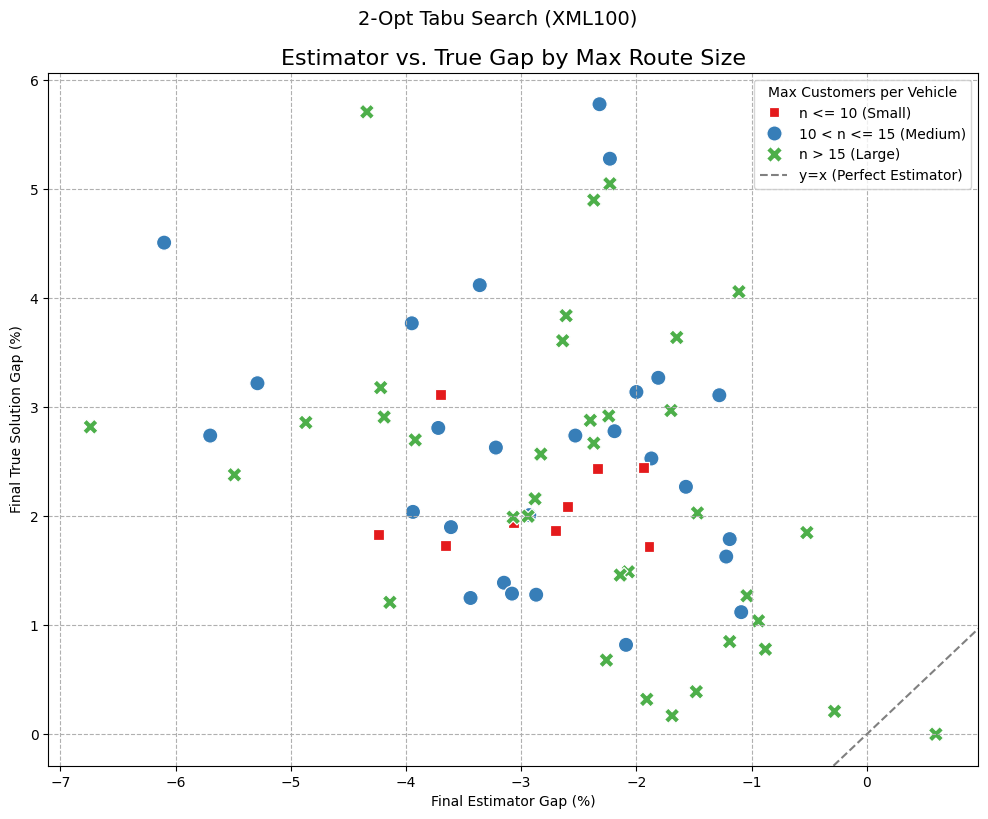

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Import pandas

# Convert 'Max_Customers_Per_Vehicle' to numeric, coercing errors
df['Max_Customers_Per_Vehicle'] = pd.to_numeric(df['Max_Customers_Per_Vehicle'], errors='coerce')

# Adapt column names to the current DataFrame
conditions = [
    df['Max_Customers_Per_Vehicle'] <= 10,
    (df['Max_Customers_Per_Vehicle'] > 10) & (df['Max_Customers_Per_Vehicle'] <= 15),
    df['Max_Customers_Per_Vehicle'] > 15
]
choices = ['n <= 10 (Small)', '10 < n <= 15 (Medium)', 'n > 15 (Large)']
df['Route_Size_Category'] = np.select(conditions, choices, default='Other')

plt.figure(figsize=(12, 9))
sns.scatterplot(
    data=df.dropna(subset=['Estimator_Gap', 'True_Gap', 'Route_Size_Category']),
    x='Estimator_Gap',
    y='True_Gap',
    hue='Route_Size_Category',
    style='Route_Size_Category',
    s=120,
    palette='Set1',
    hue_order=choices
)
plt.title('Estimator vs. True Gap by Max Route Size', fontsize=16)
plt.suptitle('2-Opt Tabu Search (XML100)', y=0.95, fontsize=14) # Add subtitle here
plt.xlabel('Final Estimator Gap (%)')
plt.ylabel('Final True Solution Gap (%)')
plt.axline((0, 0), slope=1, color='gray', linestyle='--', label='y=x (Perfect Estimator)')
plt.legend(title='Max Customers per Vehicle')
plt.grid(True, which='both', linestyle='--')
plt.show()

XML100 Tabu2 Results

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  excel_file_path = fn
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

try:
    df_new = pd.read_excel(excel_file_path)
    print("DataFrame created successfully.")
    print("\nHeader of the DataFrame:")
    display(df_new.head())
except FileNotFoundError:
    print(f"Error: The file '{excel_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Saving summary_results_comparison.xlsx to summary_results_comparison (1).xlsx
User uploaded file "summary_results_comparison (1).xlsx" with length 14103 bytes
DataFrame created successfully.

Header of the DataFrame:


,instance,Estimator_Gap_OR_Tools,Estimator_Gap_tabu2,Heuristic_Cost_OR_Tools,Heuristic_Cost_tabu2,Total_Time_OR_Tools,Total_Time_tabu2,True_Gap_OR_Tools,True_Gap_tabu2,Optimal_Cost,Max_Customers_Per_Vehicle
0,XML100_1113_14,0.17,-4.83,15182.33,16179.26,3600.0,7280.44,0.17,6.74,15157,11
1,XML100_1113_22,1.18,-4.05,14281.00,15071.11,3600.0,7280.23,1.18,6.77,14115,12
2,XML100_1114_09,0.68,-0.41,11927.53,12677.53,3600.0,7263.38,0.68,7.01,11847,12
3,XML100_1114_15,-0.02,-1.65,11088.90,11856.12,3600.0,7240.94,-0.02,6.90,11091,15
4,XML100_1115_05,0.38,-6.17,10538.75,11358.50,3600.0,7226.19,0.38,8.19,10499,22


In [ ]:
# Filter the DataFrame for instances with more than 10 customers per vehicle
df_filtered = df_new[df_new['Max_Customers_Per_Vehicle'] > 10].copy()

print("Filtered DataFrame (Max_Customers_Per_Vehicle > 10):")
display(df_filtered.head())

print("\nSummary Statistics for Filtered Data (Max_Customers_Per_Vehicle > 10):")
print("-" * 60)

# Calculate and report average and standard deviation for True_Gap_tabu2 and Estimator_Gap_tabu2
true_gap_mean = df_filtered['True_Gap_tabu2'].mean()
true_gap_std = df_filtered['True_Gap_tabu2'].std()
estimator_gap_mean = df_filtered['Estimator_Gap_tabu2'].mean()
estimator_gap_std = df_filtered['Estimator_Gap_tabu2'].std()
filtered_count = len(df_filtered) # Get the count of rows in the filtered DataFrame

print(f"Number of instances in filtered data: {filtered_count}") # Report the count
print(f"Average True Gap (tabu2): {true_gap_mean:.3f}%")
print(f"Standard Deviation True Gap (tabu2): {true_gap_std:.3f}%")
print(f"Average Estimator Gap (tabu2): {estimator_gap_mean:.3f}%")
print(f"Standard Deviation Estimator Gap (tabu2): {estimator_gap_std:.3f}%")

Filtered DataFrame (Max_Customers_Per_Vehicle > 10):


,instance,Estimator_Gap_OR_Tools,Estimator_Gap_tabu2,Heuristic_Cost_OR_Tools,Heuristic_Cost_tabu2,Total_Time_OR_Tools,Total_Time_tabu2,True_Gap_OR_Tools,True_Gap_tabu2,Optimal_Cost,Max_Customers_Per_Vehicle
0,XML100_1113_14,0.17,-4.83,15182.33,16179.26,3600.0,7280.44,0.17,6.74,15157,11
1,XML100_1113_22,1.18,-4.05,14281.00,15071.11,3600.0,7280.23,1.18,6.77,14115,12
2,XML100_1114_09,0.68,-0.41,11927.53,12677.53,3600.0,7263.38,0.68,7.01,11847,12
3,XML100_1114_15,-0.02,-1.65,11088.90,11856.12,3600.0,7240.94,-0.02,6.90,11091,15
4,XML100_1115_05,0.38,-6.17,10538.75,11358.50,3600.0,7226.19,0.38,8.19,10499,22



Summary Statistics for Filtered Data (Max_Customers_Per_Vehicle > 10):
------------------------------------------------------------
Number of instances in filtered data: 63
Average True Gap (tabu2): 4.976%
Standard Deviation True Gap (tabu2): 2.079%
Average Estimator Gap (tabu2): -3.557%
Standard Deviation Estimator Gap (tabu2): 2.217%


Quick Analysis of XML1000 Multi-Campaign Search

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  excel_file_path = fn
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

try:
    df_expanded = pd.read_excel(excel_file_path, sheet_name='Expanded')
    print("\nDataFrame from 'Expanded' sheet created successfully.")
    print("\nHeader of the DataFrame:")
    display(df_expanded.head())
except FileNotFoundError:
    print(f"Error: The file '{excel_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Saving Comparative Analysis.xlsx to Comparative Analysis.xlsx
User uploaded file "Comparative Analysis.xlsx" with length 67504 bytes

DataFrame from 'Expanded' sheet created successfully.

Header of the DataFrame:


,instance,Tabu2_Cavdar_Heuristic_Estimated_Cost,Tabu2_Cavdar_Heuristic_True_Cost,Tabu2_MLALPHA_Heuristic_Estimated_Cost,Tabu2_MLALPHA_Heuristic_True_Cost,ORTools_Heuristic_True_Cost,Kmeans_Heuristic_True_Cost,NearestNeighbor_Heuristic_True_Cost,Best_Cost,Gap_Tabu2_Cavdar,...,Gap_Tabu2Cavdar_vs_ORTools,Gap_Tabu2_MLALPHA,Gap_Tabu2MLALPHA_vs_ORTools,Est_Cavdar_Delta,Est_MLALPHA_DELTA,Est_Cavdar_Diff,Est_MLALPHA_Diff,Gap_Kmeans_vs_Best,Est_Gap_Tabu2_Cavdar,Est_Gap_Tabu2_MLALPHA
0,XML1000_111_0.15_01,30455.58,29804.84,28384.84,28593.06,26464,29711.10,29418.13,26464.0,0.126241,...,0.126241,0.080451,0.080451,650.74,208.22,0.021833,0.007282,0.122699,-0.1491,-0.0477
1,XML1000_111_0.25_01,26624.33,25419.64,26840.97,25600.89,25231,26747.05,26482.52,25231.0,0.007477,...,0.007477,0.014660,0.014660,1204.69,1240.08,0.047392,0.048439,0.060087,-0.0943,-0.0274
2,XML1000_111_0.35_01,25196.49,25035.51,26206.45,25251.68,24225,27370.19,26615.28,24225.0,0.033458,...,0.033458,0.042381,0.042381,160.98,954.77,0.006430,0.037810,0.129832,-0.1313,-0.0454
3,XML1000_111_0.5_01,25221.89,24505.68,25868.68,24017.54,24359,26903.84,24992.36,24359.0,0.006022,...,0.006022,-0.014018,-0.014018,716.21,1851.14,0.029226,0.077075,0.104472,-0.0488,-0.0377
4,XML1000_121_0.15_01,25966.47,23957.59,23171.72,24220.63,22541,28169.25,24730.58,22541.0,0.062845,...,0.062845,0.074514,0.074514,2008.88,1048.91,0.083852,0.043306,0.249689,-0.2351,-0.0368


In [ ]:
print("\nSummary statistics for all columns except the first one:")
display(df_expanded.iloc[:, 1:].describe())


Summary statistics for all columns except the first one:


,Tabu2_Cavdar_Heuristic_Estimated_Cost,Tabu2_Cavdar_Heuristic_True_Cost,Tabu2_MLALPHA_Heuristic_Estimated_Cost,Tabu2_MLALPHA_Heuristic_True_Cost,ORTools_Heuristic_True_Cost,Kmeans_Heuristic_True_Cost,NearestNeighbor_Heuristic_True_Cost,Best_Cost,Gap_Tabu2_Cavdar,Gap_ORTools,Gap_Tabu2Cavdar_vs_ORTools,Gap_Tabu2_MLALPHA,Gap_Tabu2MLALPHA_vs_ORTools,Est_Cavdar_Delta,Est_MLALPHA_DELTA,Est_Cavdar_Diff,Est_MLALPHA_Diff,Gap_Kmeans_vs_Best,Est_Gap_Tabu2_Cavdar,Est_Gap_Tabu2_MLALPHA
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,25668.505000,24687.503333,25110.549167,24419.176667,23982.472222,27578.160278,25385.237222,23954.429722,0.029056,0.001216,0.027891,0.017761,0.016588,1049.473889,941.688611,0.044731,0.039200,0.151871,-0.146531,-0.031739
std,2712.794025,2905.067535,2613.310206,2883.215340,2231.894346,2968.225779,2831.314062,2239.192003,0.042008,0.005385,0.043645,0.040266,0.041453,928.497948,554.177423,0.040902,0.023474,0.067601,0.085793,0.022267
min,21542.970000,20060.570000,20785.700000,19914.860000,20050.000000,22116.120000,20076.810000,20050.000000,-0.055795,0.000000,-0.055795,-0.062654,-0.062654,29.380000,3.980000,0.001181,0.000174,0.045883,-0.306800,-0.070800
25%,23875.702500,22931.500000,22898.617500,23095.992500,22686.500000,26494.635000,23413.060000,22686.500000,0.002908,0.000000,0.002828,-0.008048,-0.010050,261.192500,497.940000,0.010509,0.019337,0.099944,-0.218325,-0.048200
50%,25403.845000,24568.205000,25240.460000,24139.020000,24230.000000,26789.670000,25148.405000,24155.000000,0.021607,0.000000,0.021607,0.011784,0.011784,752.120000,993.785000,0.031565,0.038292,0.137391,-0.140200,-0.030000
75%,27042.010000,25778.390000,26743.635000,25692.637500,25203.250000,28709.017500,26626.215000,25203.250000,0.055111,0.000000,0.055111,0.039725,0.039725,1727.675000,1269.225000,0.069702,0.054313,0.214248,-0.063875,-0.019275
max,32330.450000,32169.650000,30709.830000,31837.250000,30276.000000,36563.810000,32552.230000,30276.000000,0.126241,0.031439,0.126241,0.116546,0.116546,3492.460000,1948.930000,0.156948,0.081697,0.281038,0.021400,0.038900


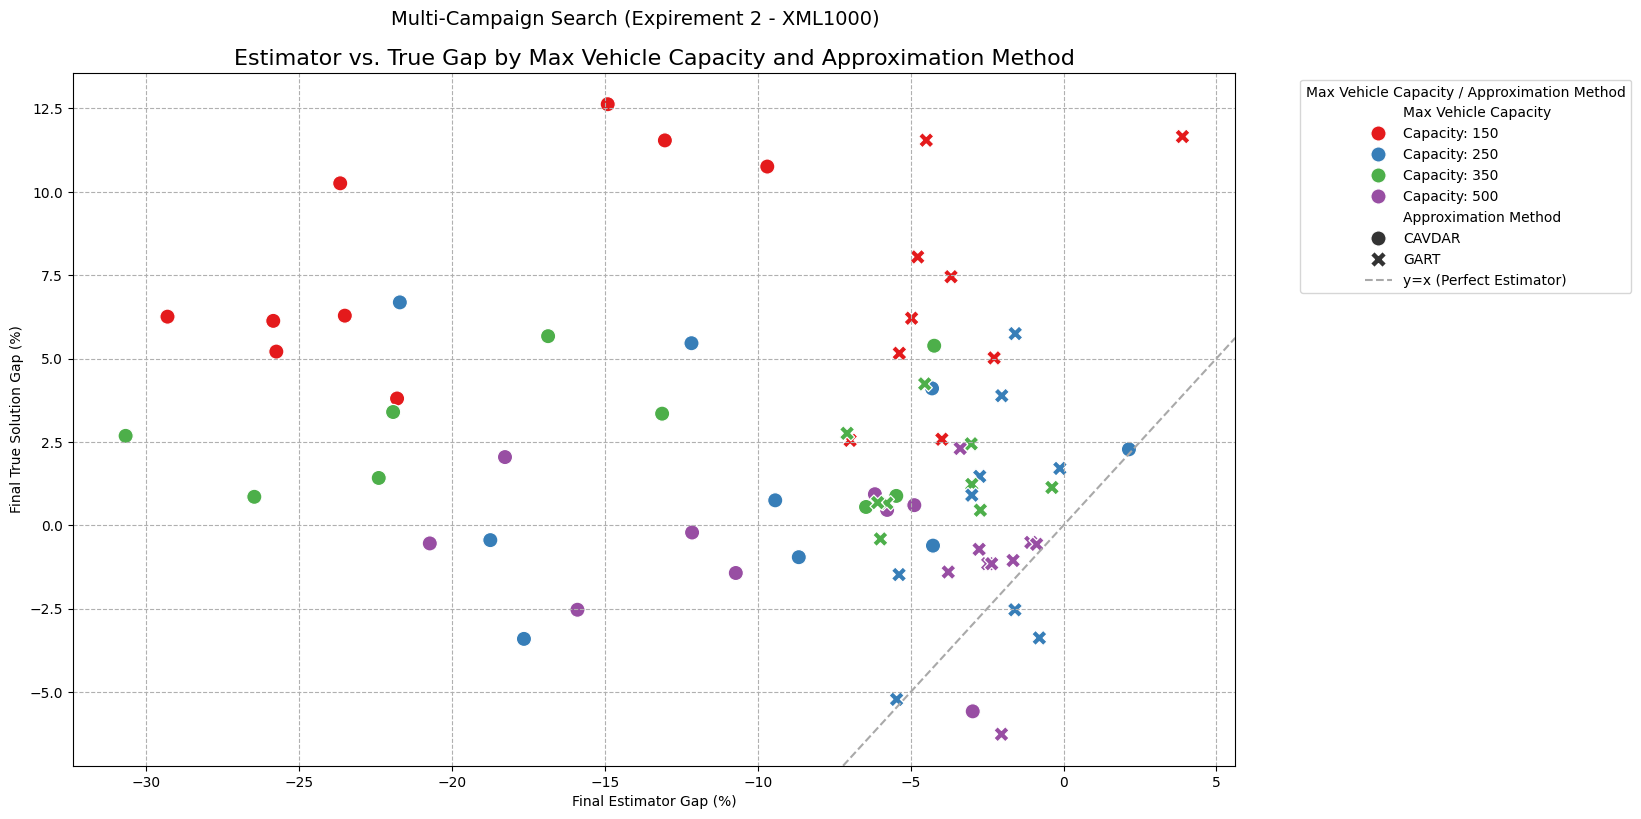

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Ellipse # Import Ellipse for drawing circles

# Extract capacity from 'instance' column and create 'Max_Customers_Per_Vehicle'
df_expanded['Max_Customers_Per_Vehicle'] = df_expanded['instance'].str.split('_').str[2].astype(float) * 1000

# Define conditions and choices for route size categories based on specific capacities
capacity_values = [150.0, 250.0, 350.0, 500.0]
conditions_expanded = [df_expanded['Max_Customers_Per_Vehicle'] == cap for cap in capacity_values]
choices_expanded = [f'Capacity: {int(cap)}' for cap in capacity_values]
df_expanded['Max Vehicle Capacity'] = np.select(conditions_expanded, choices_expanded, default='Other') # Renamed column


# Multiply gap columns by 100 for percentage display
df_expanded['Estimator Gap (%)'] = df_expanded['Est_Gap_Tabu2_Cavdar'] * 100 # Renamed column
df_expanded['True Gap (%)'] = df_expanded['Gap_Tabu2_Cavdar'] * 100 # Renamed column
df_expanded['Estimator Gap (%) MLALPHA'] = df_expanded['Est_Gap_Tabu2_MLALPHA'] * 100 # Renamed column
df_expanded['True Gap (%) MLALPHA'] = df_expanded['Gap_Tabu2_MLALPHA'] * 100 # Renamed column


# Restructure data for plotting both solvers
df_cavdar = df_expanded.copy()
df_cavdar['Approximation Method'] = 'CAVDAR' # Renamed column
df_cavdar = df_cavdar[['instance', 'Estimator Gap (%)', 'True Gap (%)', 'Max Vehicle Capacity', 'Approximation Method']] # Using renamed columns

df_mlalpha = df_expanded.copy()
df_mlalpha['Approximation Method'] = 'GART' # Renamed value and column
df_mlalpha = df_mlalpha[['instance', 'Estimator Gap (%) MLALPHA', 'True Gap (%) MLALPHA', 'Max Vehicle Capacity', 'Approximation Method']].rename(columns={'Estimator Gap (%) MLALPHA': 'Estimator Gap (%)', 'True Gap (%) MLALPHA': 'True Gap (%)'}) # Using and renaming columns

df_combined = pd.concat([df_cavdar, df_mlalpha])


plt.figure(figsize=(15, 9))
ax = sns.scatterplot(
    data=df_combined.dropna(subset=['Estimator Gap (%)', 'True Gap (%)', 'Max Vehicle Capacity', 'Approximation Method']),
    x='Estimator Gap (%)',
    y='True Gap (%)',
    hue='Max Vehicle Capacity',
    style='Approximation Method', # Using renamed column
    s=120,
    palette='Set1',
    hue_order=choices_expanded
)
plt.suptitle('Multi-Campaign Search (Expirement 2 - XML1000)', y=0.95, fontsize=14)
plt.title('Estimator vs. True Gap by Max Vehicle Capacity and Approximation Method', fontsize=16)
plt.xlabel('Final Estimator Gap (%)')
plt.ylabel('Final True Solution Gap (%)')
plt.axline((0, 0), slope=1, color='darkgray', linestyle='--', label='y=x (Perfect Estimator)') # Changed color to darkgray
plt.legend(title='Max Vehicle Capacity / Approximation Method', bbox_to_anchor=(1.05, 1), loc='upper left') # Updated legend title
plt.grid(True, which='both', linestyle='--')

# Draw dashed lines connecting points from the same instance
for instance in df_expanded['instance'].unique():
    instance_data = df_combined[df_combined['instance'] == instance].dropna(subset=['Estimator Gap (%)', 'True Gap (%)'])
    if len(instance_data) == 2: # Only draw line if both solvers have data for this instance
        x_coords = instance_data['Estimator Gap (%)']
        y_coords = instance_data['True Gap (%)']
        #plt.plot(x_coords, y_coords, color='white', linestyle='--', linewidth=1) # Changed line color to dimgray

plt.show()

In [ ]:
import numpy as np
from scipy import stats

def calculate_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    if n == 0:
        return np.nan, np.nan, np.nan
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.interval(confidence, n-1)[1] if n > 1 else 0
    return m, m-h, m+h

print("Full Summary Statistics for XML1000 Multi-Campaign Search (True Costs):")
print("-" * 60)

# Calculate percent differences between Cavdar and other methods
df_expanded['Cavdar_vs_ORTools_Percent_Diff'] = ((df_expanded['Tabu2_Cavdar_Heuristic_True_Cost'] - df_expanded['ORTools_Heuristic_True_Cost']) / df_expanded['ORTools_Heuristic_True_Cost']) * 100
# Removed ClarkWright calculation: df_expanded['Cavdar_vs_ClarkWright_Percent_Diff'] = ((df_expanded['Tabu2_Cavdar_Heuristic_True_Cost'] - df_expanded['ClarkWright_Heuristic_True_Cost']) / df_expanded['ClarkWright_Heuristic_True_Cost']) * 100
df_expanded['Cavdar_vs_Kmeans_Percent_Diff'] = ((df_expanded['Tabu2_Cavdar_Heuristic_True_Cost'] - df_expanded['Kmeans_Heuristic_True_Cost']) / df_expanded['Kmeans_Heuristic_True_Cost']) * 100
df_expanded['Cavdar_vs_NearestNeighbor_Percent_Diff'] = ((df_expanded['Tabu2_Cavdar_Heuristic_True_Cost'] - df_expanded['NearestNeighbor_Heuristic_True_Cost']) / df_expanded['NearestNeighbor_Heuristic_True_Cost']) * 100

# Calculate percent differences between MLALPHA and other methods
df_expanded['MLALPHA_vs_ORTools_Percent_Diff'] = ((df_expanded['Tabu2_MLALPHA_Heuristic_True_Cost'] - df_expanded['ORTools_Heuristic_True_Cost']) / df_expanded['ORTools_Heuristic_True_Cost']) * 100
# Removed ClarkWright calculation: df_expanded['MLALPHA_vs_ClarkWright_Percent_Diff'] = ((df_expanded['Tabu2_MLALPHA_Heuristic_True_Cost'] - df_expanded['ClarkWright_Heuristic_True_Cost']) / df_expanded['ClarkWright_Heuristic_True_Cost']) * 100
df_expanded['MLALPHA_vs_Kmeans_Percent_Diff'] = ((df_expanded['Tabu2_MLALPHA_Heuristic_True_Cost'] - df_expanded['Kmeans_Heuristic_True_Cost']) / df_expanded['Kmeans_Heuristic_True_Cost']) * 100 # Corrected typo
df_expanded['MLALPHA_vs_NearestNeighbor_Percent_Diff'] = ((df_expanded['Tabu2_MLALPHA_Heuristic_True_Cost'] - df_expanded['NearestNeighbor_Heuristic_True_Cost']) / df_expanded['NearestNeighbor_Heuristic_True_Cost']) * 100

# Calculate percent differences for Cavdar and MLALPHA against the Best_Cost
df_expanded['Cavdar_vs_Best_Percent_Diff'] = ((df_expanded['Tabu2_Cavdar_Heuristic_True_Cost'] - df_expanded['Best_Cost']) / df_expanded['Best_Cost']) * 100
df_expanded['MLALPHA_vs_Best_Percent_Diff'] = ((df_expanded['Tabu2_MLALPHA_Heuristic_True_Cost'] - df_expanded['Best_Cost']) / df_expanded['Best_Cost']) * 100


metrics_expanded = {
    'Cavdar_vs_ORTools_Percent_Diff': 'Cavdar vs. ORTools',
    # Removed ClarkWright metric: 'Cavdar_vs_ClarkWright_Percent_Diff': 'Cavdar vs. ClarkWright',
    'Cavdar_vs_Kmeans_Percent_Diff': 'Cavdar vs. KMeans',
    'Cavdar_vs_NearestNeighbor_Percent_Diff': 'Cavdar vs. NearestNeighbor',
    'MLALPHA_vs_ORTools_Percent_Diff': 'MLALPHA vs. ORTools',
    # Removed ClarkWright metric: 'MLALPHA_vs_ClarkWright_Percent_Diff': 'MLALPHA vs. ClarkWright',
    'MLALPHA_vs_Kmeans_Percent_Diff': 'MLALPHA vs. KMeans',
    'MLALPHA_vs_NearestNeighbor_Percent_Diff': 'MLALPHA vs. NearestNeighbor',
    'Cavdar_vs_Best_Percent_Diff': 'Cavdar vs. Best', # Added new metric
    'MLALPHA_vs_Best_Percent_Diff': 'MLALPHA vs. Best' # Added new metric
}

for col, label in metrics_expanded.items():
    mean, lower, upper = calculate_confidence_interval(df_expanded[col].dropna())
    min_val = df_expanded[col].min()
    max_val = df_expanded[col].max()
    q1 = df_expanded[col].quantile(0.25)
    q3 = df_expanded[col].quantile(0.75)
    negative_count = (df_expanded[col] < 0).sum()
    total_count = df_expanded[col].count()


    print(f"\n{label}:")
    print(f"  Mean: {mean:.3f}% (95% CI: {lower:.3f}%-{upper:.3f}%)")
    print(f"  Min: {min_val:.3f}%")
    print(f"  Max: {max_val:.3f}%")
    print(f"  Q1: {q1:.3f}%")
    print(f"  Q3: {q3:.3f}%")
    print(f"  Negative Gaps: {negative_count} out of {total_count}")

print("\nStandard Deviations:")
std_dev_metrics_expanded = {
    'Cavdar_vs_ORTools_Percent_Diff': 'Cavdar vs. ORTools',
    # Removed ClarkWright metric: 'Cavdar_vs_ClarkWright_Percent_Diff': 'Cavdar vs. ClarkWright',
    'Cavdar_vs_Kmeans_Percent_Diff': 'Cavdar vs. KMeans',
    'Cavdar_vs_NearestNeighbor_Percent_Diff': 'Cavdar vs. NearestNeighbor',
    'MLALPHA_vs_ORTools_Percent_Diff': 'MLALPHA vs. ORTools',
    # Removed ClarkWright metric: 'MLALPHA_vs_ClarkWright_Percent_Diff': 'MLALPHA vs. ClarkWright',
    'MLALPHA_vs_Kmeans_Percent_Diff': 'MLALPHA vs. KMeans',
    'MLALPHA_vs_NearestNeighbor_Percent_Diff': 'MLALPHA vs. NearestNeighbor',
    'Cavdar_vs_Best_Percent_Diff': 'Cavdar vs. Best', # Added new metric
    'MLALPHA_vs_Best_Percent_Diff': 'MLALPHA vs. Best' # Added new metric
}

for col, label in std_dev_metrics_expanded.items():
    print(f"  StdDev Percent Difference ({label}): {df_expanded[col].std():.2f}%")

Full Summary Statistics for XML1000 Multi-Campaign Search (True Costs):
------------------------------------------------------------

Cavdar vs. ORTools:
  Mean: 2.789% (95% CI: 1.312%-4.266%)
  Min: -5.580%
  Max: 12.624%
  Q1: 0.283%
  Q3: 5.511%
  Negative Gaps: 9 out of 36

Cavdar vs. KMeans:
  Mean: -10.483% (95% CI: -11.951%--9.015%)
  Min: -21.251%
  Max: 0.316%
  Q1: -12.790%
  Q3: -7.791%
  Negative Gaps: 35 out of 36

Cavdar vs. NearestNeighbor:
  Mean: -2.758% (95% CI: -3.777%--1.740%)
  Min: -7.164%
  Max: 3.499%
  Q1: -4.751%
  Q3: -1.121%
  Negative Gaps: 28 out of 36

MLALPHA vs. ORTools:
  Mean: 1.659% (95% CI: 0.256%-3.061%)
  Min: -6.265%
  Max: 11.655%
  Q1: -1.005%
  Q3: 3.972%
  Negative Gaps: 13 out of 36

MLALPHA vs. KMeans:
  Mean: -11.462% (95% CI: -12.898%--10.027%)
  Min: -21.585%
  Max: -3.763%
  Q1: -14.210%
  Q3: -8.438%
  Negative Gaps: 36 out of 36

MLALPHA vs. NearestNeighbor:
  Mean: -3.829% (95% CI: -4.737%--2.922%)
  Min: -8.332%
  Max: 2.138%
  Q1: 